# Libraries & Dataset

**Look inside of iris**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# Dataset

**Data Exploration**

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# Splitting Data

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression
modlrm = LogisticRegression()

modlrm.fit(X_train, y_train)

accuracies = {}
acc = modlrm.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 93.33%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [7]:
modlrm.predict([[4.8,3.0,1.5,0.3]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

# Support Vector Machine (SVM) Model

In [8]:
from sklearn.svm import SVC
modsvm = SVC()

# SVC() = {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# use one to diffrent score

modsvm.fit(X_train, y_train)

acc = modsvm.score(X_test,y_test)*100
accuracies['Support Vector Machine'] = acc
print("Test Accuracy of SVM : {:.2f}%".format(acc))

Test Accuracy of SVM : 93.33%


In [9]:
modsvm.predict([[4.8,3.0,1.5,0.3]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])

# Decision Tree Model

In [10]:
from sklearn import tree
moddt = tree.DecisionTreeClassifier()
moddt.fit(X_train, y_train)

acc = moddt.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 93.33%


In [11]:
moddt.predict([[4.8,3.0,1.5,0.3]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

# Random Forest Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
modrf = RandomForestClassifier()
modrf.fit(X_train, y_train)
modrf.score(X_test, y_test)

acc = modrf.score(X_test, y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Test Accuracy {:.2f}%".format(acc))

Random Forest Test Accuracy 93.33%


In [13]:
modrf.predict([[4.8,3.0,1.5,0.3]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
modnb = GaussianNB()
modnb.fit(X_train,y_train)
modnb.score(X_test,y_test)

acc = modnb.score(X_test, y_test)*100
accuracies['Naive Bayes'] = acc
print("Naive Bayes Test Accuracy {:.2f}%".format(acc))

Naive Bayes Test Accuracy 93.33%


In [15]:
modnb.predict([[4.8,3.0,1.5,0.3]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([0])

# Comparing Model

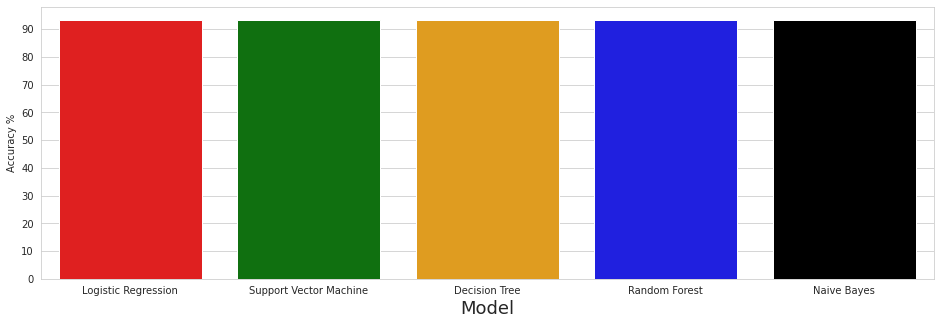

In [16]:
colors = ["red", "green", "orange", "blue", "black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Model", size=18)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [17]:
y_pred_modlrm = modlrm.predict(X_test)
y_pred_modsvm = modsvm.predict(X_test)
y_pred_moddt = moddt.predict(X_test)
y_pred_modrf = modrf.predict(X_test)
y_pred_modnb = modnb.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm_modlrm = confusion_matrix(y_test, y_pred_modlrm)
cm_modsvm = confusion_matrix(y_test, y_pred_modsvm)
cm_moddt = confusion_matrix(y_test, y_pred_moddt)
cm_modrf = confusion_matrix(y_test, y_pred_modrf)
cm_modnb = confusion_matrix(y_test, y_pred_modnb)

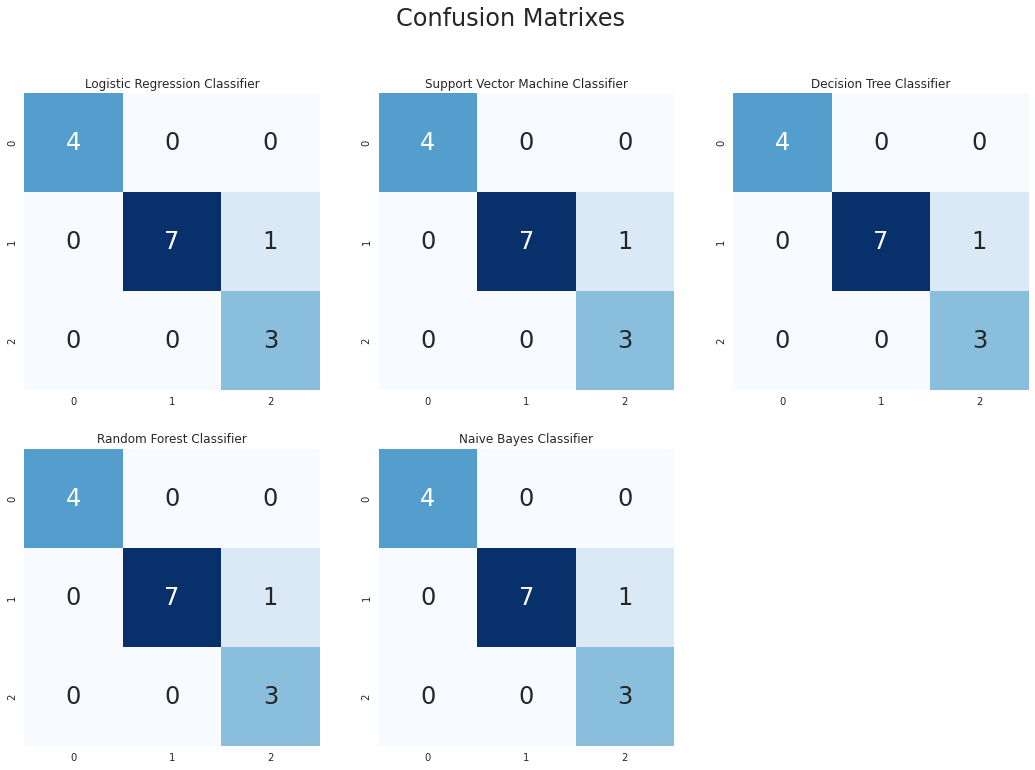

In [19]:
plt.figure(figsize=(18,12))

plt.suptitle("Confusion Matrixes",fontsize=24)


plt.subplot(2,3,1)
plt.title("Logistic Regression Classifier")
sns.heatmap(cm_modlrm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Classifier")
sns.heatmap(cm_modsvm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Decision Tree Classifier")
sns.heatmap(cm_moddt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Random Forest Classifier")
sns.heatmap(cm_modrf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Classifier")
sns.heatmap(cm_modnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()